 **IMPORT LIBRARIES**

In [2]:
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from keras.losses import BinaryCrossentropy


**IMPORT DATASET**

In [3]:
(X_train, Y_train), (X_test, Y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

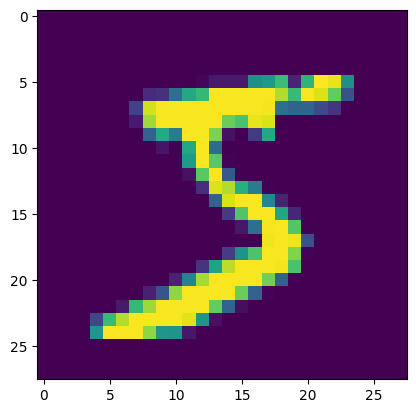

In [5]:
plt.imshow(X_train[0])


**RESHPE AND ENCODE**

In [6]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [7]:
Y_training=to_categorical(Y_train, num_classes=10)
Y_testing=to_categorical(Y_test, num_classes=10)
print(Y_training[0], Y_training[1], Y_training[2])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


**BUILD THE NEURAL NETWORK**

In [8]:

model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None),
    Flatten(),  # Flatten input image
    Dense(units=25, activation='sigmoid'),
    Dense(units=15, activation='sigmoid'),
    Dense(units=10, activation='softmax')
])


In [9]:
# FOR A SIMPLER NETWORK, WITH 93% ACCURACY:
'''
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(units=25, activation='sigmoid'),
    Dense(units=15, activation='sigmoid'),
    Dense(units=10, activation='softmax')
])
'''


"\nmodel = Sequential([\n    Flatten(input_shape=(28, 28, 1)),\n    Dense(units=25, activation='sigmoid'),\n    Dense(units=15, activation='sigmoid'),\n    Dense(units=10, activation='softmax') \n])\n"

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**TRAIN**

In [11]:
model.fit(X_train, Y_training, validation_data=(X_test,Y_testing), epochs=50)

Epoch 1/50
1875/1875 [==============================] - 16s 6ms/step - loss: 1.0207 - accuracy: 0.7967 - val_loss: 0.2983 - val_accuracy: 0.9436
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2330 - accuracy: 0.9458 - val_loss: 0.1861 - val_accuracy: 0.9532
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1645 - accuracy: 0.9562 - val_loss: 0.1477 - val_accuracy: 0.9600
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1469 - accuracy: 0.9592 - val_loss: 0.1419 - val_accuracy: 0.9617
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1430 - accuracy: 0.9594 - val_loss: 0.1322 - val_accuracy: 0.9643
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1323 - accuracy: 0.9619 - val_loss: 0.1385 - val_accuracy: 0.9603
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1292 - accuracy: 0.9627 - val_loss: 0.1360 - val_accura

**TEST THE TRAINED MODEL**

313/313 [==============================] - 1s 2ms/step
Predicted Class is: 7


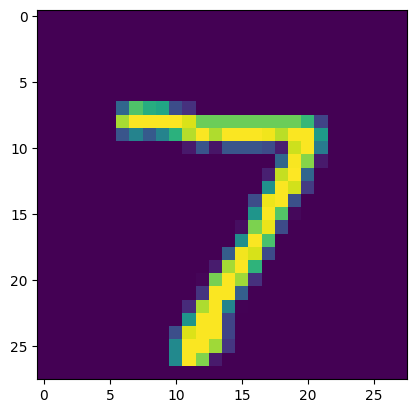

In [14]:
predictions= model.predict(X_test)
predicted_classes= predictions.argmax(axis=1)
plt.imshow(X_test[0])
print(f'Predicted Class is: {predicted_classes[0]}')

313/313 [==============================] - 1s 3ms/step
Predicted Class is: 0


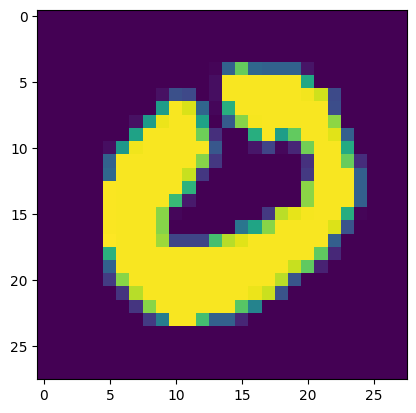

In [17]:
predictions= model.predict(X_test)
predicted_classes= predictions.argmax(axis=1)
plt.imshow(X_test[25])
print(f'Predicted Class is: {predicted_classes[25]}')



> Hafsa Rafique






